# A|B Testing While Exploring Consumer Complaints 

Explore financial product and service complaints to see how companies respond to consumers. View trends, see maps, read complaints, and visualize the data.


Data Source: https://www.consumerfinance.gov/data-research/consumer-complaints/

In [5]:
import pandas as pd
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [7]:
#Load the dataset
data = pd.read_csv('complaints.csv', dtype={9: 'object'})

## Exploratory Data Analysis

In [8]:
#Display the first 5 rows
print(data.head())

  Date received                                            Product  \
0    2023-04-28  Credit reporting, credit repair services, or o...   
1    2023-04-29  Credit reporting, credit repair services, or o...   
2    2023-04-29  Credit reporting, credit repair services, or o...   
3    2023-04-25  Credit reporting, credit repair services, or o...   
4    2023-04-29  Credit reporting, credit repair services, or o...   

        Sub-product                                              Issue  \
0  Credit reporting                        Improper use of your report   
1  Credit reporting                        Improper use of your report   
2  Credit reporting                        Improper use of your report   
3  Credit reporting  Problem with a credit reporting company's inve...   
4  Credit reporting               Incorrect information on your report   

                                           Sub-issue  \
0      Reporting company used your report improperly   
1  Credit inquiries on

In [9]:
#Get dataset info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589639 entries, 0 to 3589638
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 493.

In [15]:
#Get summary statistics / Really no need for this. This is the only integer based variable
print(data.describe())

       Complaint ID
count  3.589639e+06
mean   3.939447e+06
std    1.843703e+06
min    1.000000e+00
25%    2.712808e+06
50%    3.888998e+06
75%    5.584248e+06
max    6.917074e+06


In [11]:
#Get unique value counts for a specific column
#Replace 'column_name' with the name of the column you want to explore
print(data['Product'].value_counts())

Credit reporting, credit repair services, or other personal consumer reports    1821451
Debt collection                                                                  480235
Mortgage                                                                         375976
Credit card or prepaid card                                                      186189
Checking or savings account                                                      163863
Credit reporting                                                                 140429
Credit card                                                                       89190
Bank account or service                                                           86205
Student loan                                                                      74202
Money transfer, virtual currency, or money service                                53579
Vehicle loan or lease                                                             42975
Consumer Loan                   

In [13]:
#Get unique value counts for a specific column
#Replace 'column_name' with the name of the column you want to explore
print(data['Issue'].value_counts())

Incorrect information on your report                                                896892
Problem with a credit reporting company's investigation into an existing problem    486855
Improper use of your report                                                         411319
Attempts to collect debt not owed                                                   167925
Loan modification,collection,foreclosure                                            112306
                                                                                     ...  
Problem with an overdraft                                                                9
Lender damaged or destroyed vehicle                                                      8
Lender sold the property                                                                 7
Property was damaged or destroyed property                                               7
Lender damaged or destroyed property                                                     3

In [17]:
#Get the number of missing values in each column
print(data.isnull().sum())

Date received                         0
Product                               0
Sub-product                      235291
Issue                                 0
Sub-issue                        704630
Consumer complaint narrative    2293055
Company public response         1979567
Company                               0
State                             41223
ZIP code                          41852
Tags                            3197955
Consumer consent provided?       876650
Submitted via                         0
Date sent to company                  0
Company response to consumer          4
Timely response?                      0
Consumer disputed?              2821281
Complaint ID                          0
dtype: int64


## Clean Data to Conduct A T-Test

In [18]:
#Filter the dataset to include only relevant columns
data = data[['Product', 'Issue', 'Company', 'State', 'Submitted via', 
             'Company response to consumer', 'Timely response?']]

In [19]:
#Drop rows with missing values (NA Values) that were identified during EDA
data = data.dropna()

In [20]:
#assign data to variables for T-test
web_complaints = data[data['Submitted via'] == 'Web']
phone_complaints = data[data['Submitted via'] == 'Phone']

## T-Test 
Comparing just the number of complaints submitted via the web VS. those submitted via phone. (2 groups)

In [21]:
#Perform T-test 
t_stat, p_value = ttest_ind(web_complaints.index, phone_complaints.index)
print('t-statistic:', t_stat)
print('p-value:', p_value)

t-statistic: -91.1782086804303
p-value: 0.0


In [25]:
#Calculate means and standard deviations of different complaints
web_mean = np.mean(web_complaints.index)
phone_mean = np.mean(phone_complaints.index)
web_std = np.std(web_complaints.index)
phone_std = np.std(phone_complaints.index)

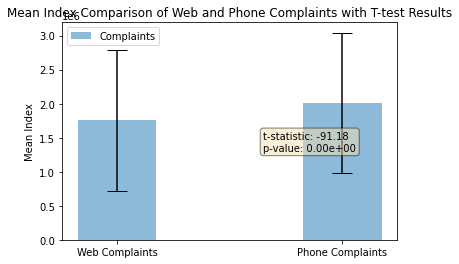

In [26]:
#Create a bar plot
labels = ['Web Complaints', 'Phone Complaints']
means = [web_mean, phone_mean]
std_devs = [web_std, phone_std]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, means, width, yerr=std_devs, align='center', alpha=0.5, ecolor='black', capsize=10, label='Complaints')

#Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Index')
ax.set_title('Mean Index Comparison of Web and Phone Complaints with T-test Results')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#Add t-test results as text on the plot
t_test_text = f"t-statistic: {t_stat:.2f}\np-value: {p_value:.2e}"
ax.text(0.6, 0.5, t_test_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.show()


## ANOVA Testing

Comparing the number of complaints submitted via different methods. (Multiple Groups)

In [22]:
#Convert 'Submitted via' column to categorical data type
data['Submitted_via_cat'] = data['Submitted via'].astype('category').cat.codes

In [23]:
#Perform the ANOVA analysis
anova_model = ols('Submitted_via_cat ~ C(State)', data=data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

                sum_sq         df           F  PR(>F)
C(State)  1.094046e+04       62.0  319.099398     0.0
Residual  1.962204e+06  3548349.0         NaN     NaN
